In [32]:
import cv2 
import numpy as np 
import imutils
import matplotlib.pyplot as plt 


In [86]:
def run_experiment(img_path):
    image = cv2.imread(img_path)
    result = get_documet(image[:,:,::-1])
    
    plot_two_images(image[:,:,::-1], "Original Image", result, "Resulant Image")
    

In [ ]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype="float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped



In [40]:
def get_documet(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 10, 50)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    # cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    cnts = sorted(cnts, key=lambda x: cv2.contourArea(x), reverse=True)[:5]
    screenCnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            screenCnt = approx
            break

            
    ratio = 1
    pts = np.array(screenCnt.reshape(4, 2) * ratio)
    warped = four_point_transform(image, pts)
    
    return warped 

In [56]:
def plot_two_images(img1, title1, img2, title2):
    
    plt.figure(figsize = (20,8))
    plt.subplot(121)
    plt.imshow(img1)
    plt.title(title1)
    
    plt.subplot(122)
    if img2.ndim == 2:
        plt.imshow(img2, cmap="gray")
    else:
        plt.imshow(img2)
    plt.title(title2)

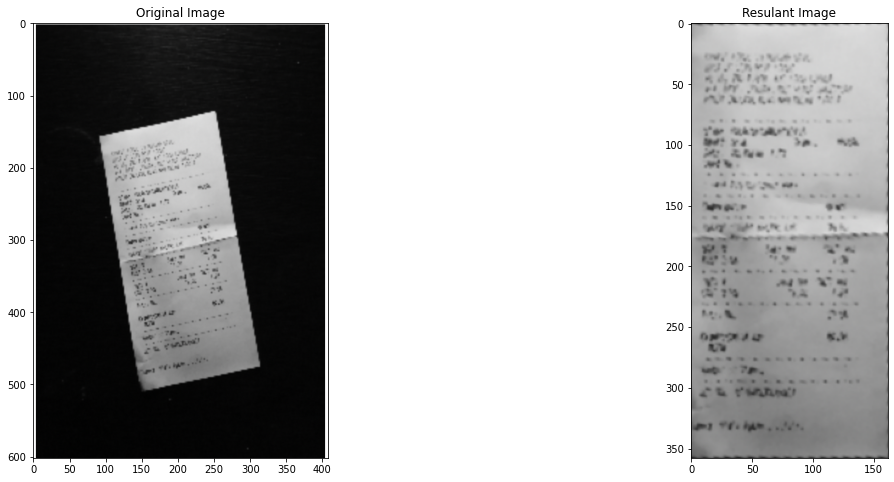

In [87]:
image = cv2.imread("sample.png")

result = get_documet(image)


plot_two_images(image, "Original Image", result, "Resulant Image")

In [77]:
test.shape

(465, 1000, 3)

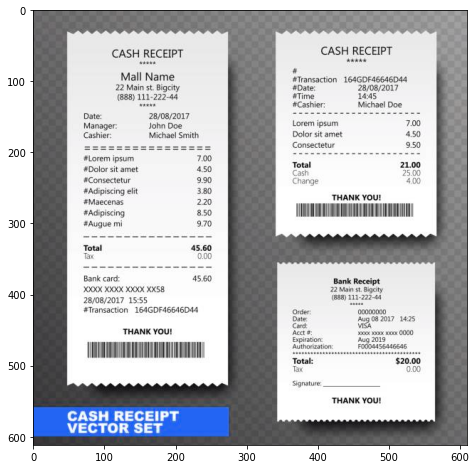

In [72]:
sample = cv2.imread("sample5.jpeg",1)

plt.figure(figsize = (12,8))
plt.imshow(sample)

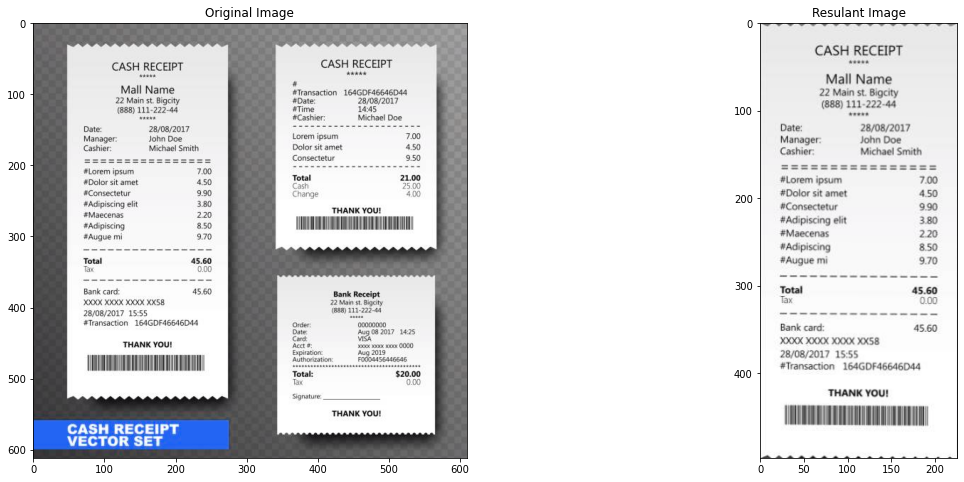

In [63]:
image = cv2.imread("sample5.jpeg",1)

result = get_documet(image)

plot_two_images(image, "Original Image", result, "Resulant Image")

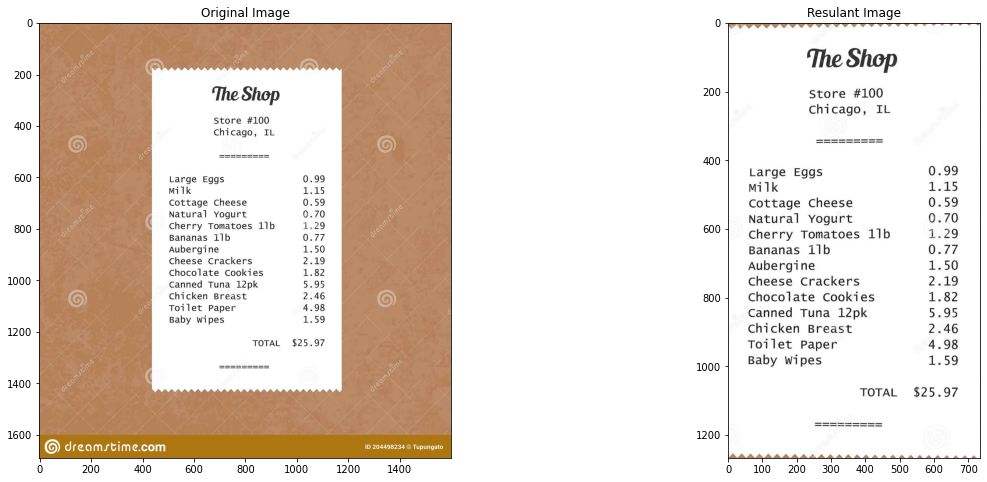

In [55]:
run_experiment("sample6.jpeg")

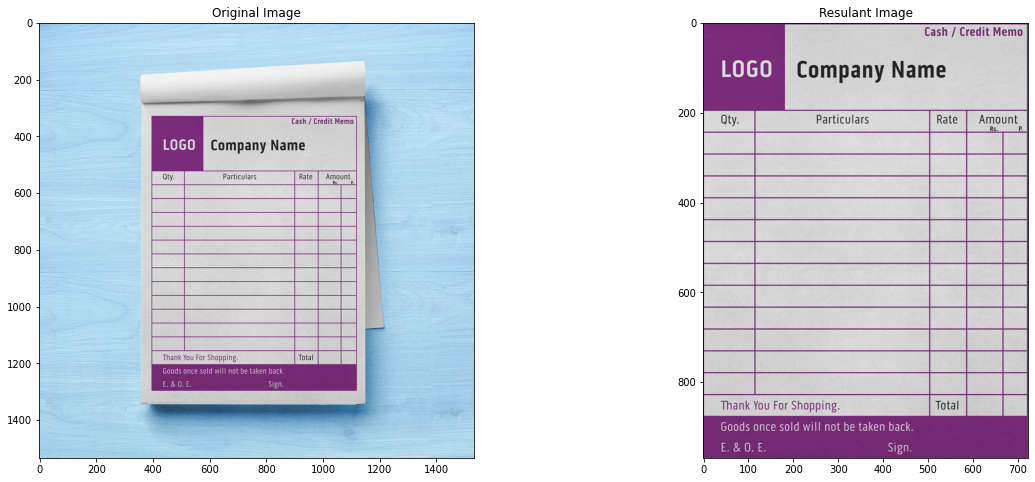

In [65]:
run_experiment("sample8.jpeg")

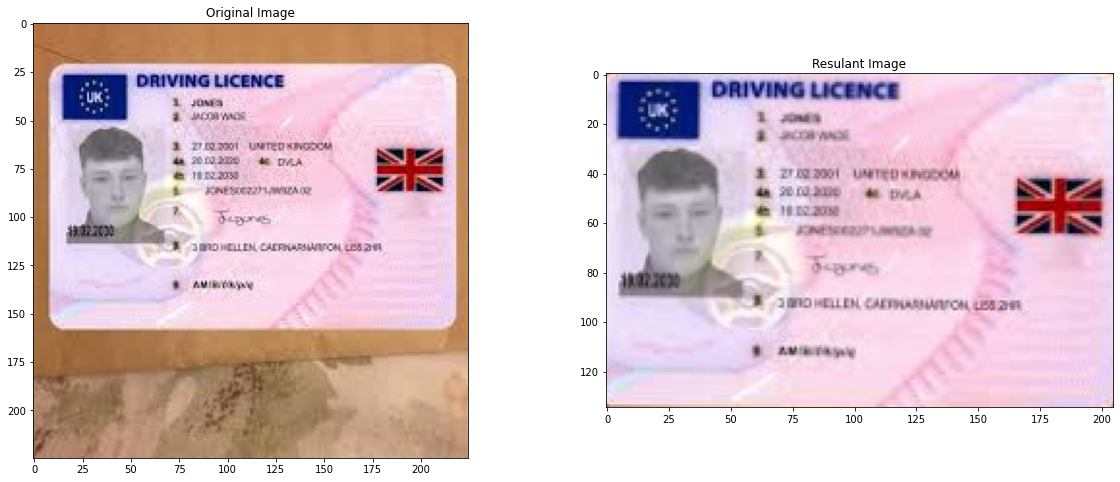

In [93]:
run_experiment("sample14.jpeg")

## NOT Working when image is not complete 

- If image is not complete

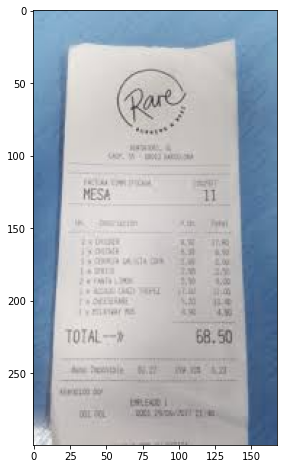

In [67]:
sample = cv2.imread("sample4.png")

plt.figure(figsize = (12,8))
plt.imshow(sample)

In [68]:
run_experiment("sample4.png")

AttributeError: 'NoneType' object has no attribute 'reshape'

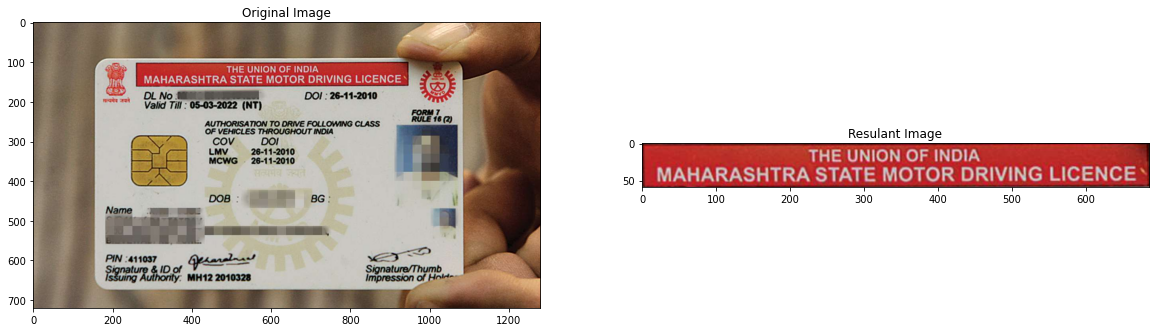

In [90]:
run_experiment("sample12.jpeg")

- ## If background is very similar to the page 

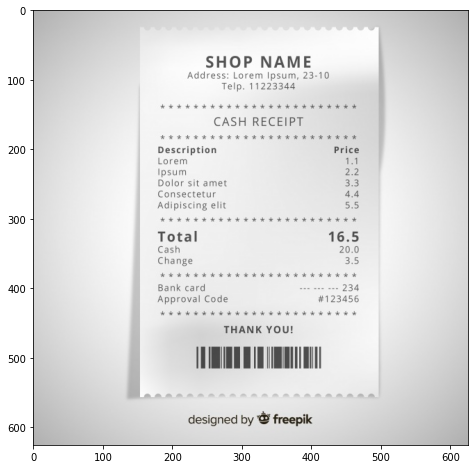

In [70]:
sample = cv2.imread("sample3.png")

plt.figure(figsize = (12,8))
plt.imshow(sample)

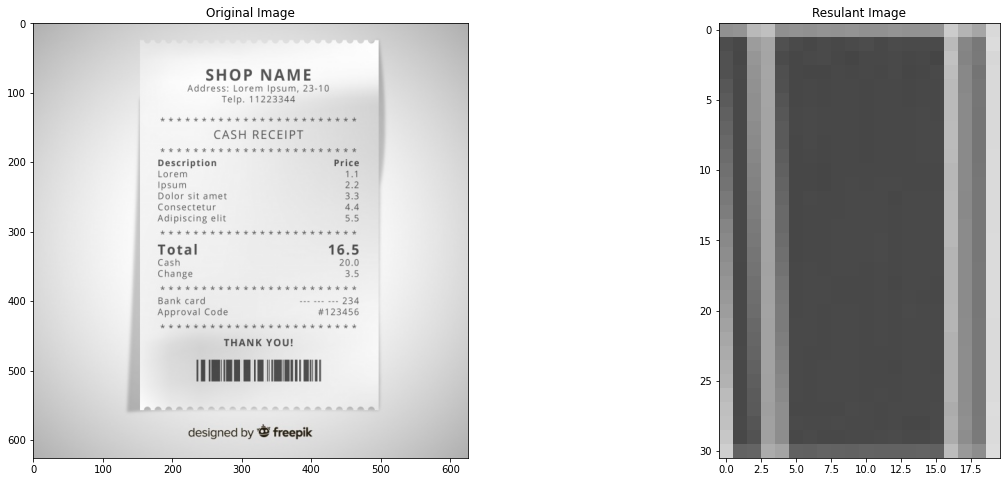

In [71]:
run_experiment("sample3.png")

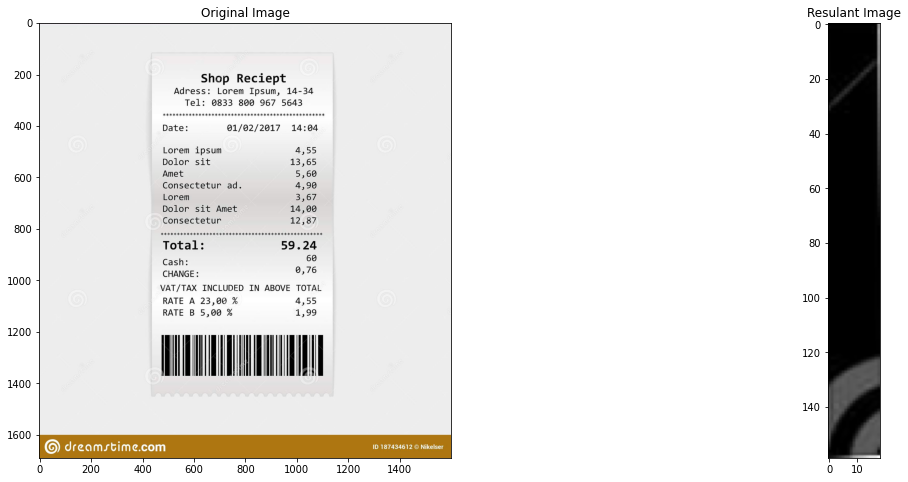

In [73]:
run_experiment("sample9.jpeg")